In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

c:\Users\Juhana\scoop\apps\pyenv\current\pyenv-win\versions\3.11.0rc2\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [9]:
%%R

# My commonly used R imports
require('ggplot2')
require('ggrepel')
require('readr')
require('tidyverse')
require('extrafont')


R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: tidyverse



-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v purrr   1.0.1      v forcats 0.5.2 
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R



In [6]:
df = pd.read_csv('airports_final_product.csv')
df.head()

,ident,iata_code,type,name,iso_country,latitude_deg,longitude_deg,elevation_ft,runway_count,max_runway,avg_runway
0,5A8,WKK,medium_airport,Aleknagik / New Airport,US,59.282600,-158.617996,66.0,1,2040.0,2040.0
1,AGGH,HIR,large_airport,Honiara International Airport,SB,-9.428000,160.054993,28.0,1,7218.0,7218.0
2,AGGM,MUA,medium_airport,Munda Airport,SB,-8.327970,157.263000,10.0,1,4593.0,4593.0
3,AHJ,AHJ,medium_airport,Hongyuan Airport,CN,32.531540,102.352240,11600.0,1,11811.0,11811.0
4,ANYN,INU,medium_airport,Nauru International Airport,NR,-0.547458,166.919006,22.0,1,7054.0,7054.0


In [7]:
piv = df \
    .pivot_table(index='type', 
                 values='elevation_ft', 
                 aggfunc=['mean', 'median', 'std', 'count'])
piv

,mean,median,std,count
,elevation_ft,elevation_ft,elevation_ft,elevation_ft
type,,,,
large_airport,764.973856,162.0,1508.581946,459
medium_airport,1068.992343,399.0,1669.299733,4310


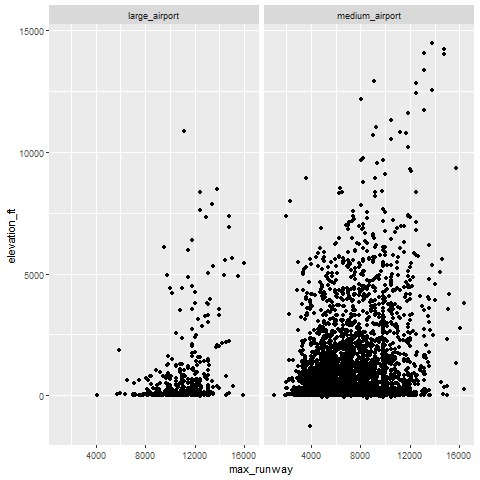

In [10]:
%%R -i df
# Plot + 
# Aesthetics
ggplot(df) +
    aes(x=max_runway, y=elevation_ft) +
    geom_point() +
    facet_wrap(~type) 

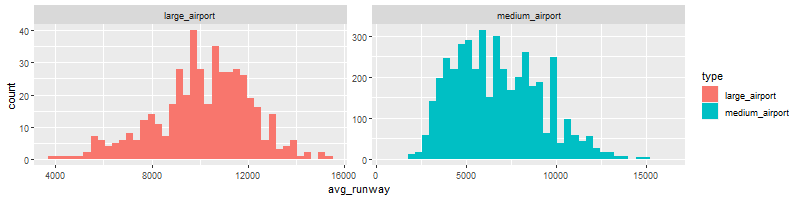

In [11]:
%%R -w 800 -h200

# Plot +
# Aesthetics + 
# Geom
ggplot(df) + 
    aes(x=avg_runway, fill=type) +
    geom_histogram(bins=40) +
    facet_wrap(~type, nrow=1, scales="free")

In [ ]:
piv = airports \
    .pivot_table(index='pollster', 
                 values='error', 
                 aggfunc=['mean', 'median', 'std', 'count']) \
    #.sort_values(by=('mean', 'error'))\

# filter out any pollster with less than 10 polls
piv[piv[('count','error')] > 10].tail(25)